# Multilayer Perceptron
We build a multilayered perceptron with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size, and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

<img src="multilayerPerceptron.jpg" alt="Drawing" style="width: 450px;"/>

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

## MNIST Data Set

The MNIST data set consists of $70000$ images of hand written digits, $60000$ of which are typically used as labeled training examples, where the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.

<img src="MnistExamples.png" alt="Drawing" style="width: 500px;"/>


Each image in the MNIST data set is stored as a matrix.

<img src="MNIST-Matrix.png" alt="Drawing" style="width: 500px;"/>

In [28]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()


The data structures train_X and test_X are stored as 3 dimensional tensors. 
 
 
 
<img src="order-3-tensor.png" alt="Drawing" style="width: 300px;"/>

In [29]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
X = []
for i, x in enumerate(train_X):
    X.append(x.flatten().reshape(784, 1))
    
# One hot encode the training labels
Y = []
for label in train_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label][0] = 1.0
    Y.append(temp_vec)

# Store the training data as a tuple
train_data = [x for x in zip(X, Y)]


# Do the same for the testing data 
X = []
for i, x in enumerate(test_X):
    X.append(x.flatten().reshape(784, 1))
    
Y = []
for label in test_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label] = 1.0
    Y.append(temp_vec)
    
test_data = [x for x in zip(X, Y)]

In [30]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [31]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

In [32]:
# Start with a0
W, B = initialize_weights()

a0 = train_data[0][0]
a0

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [33]:
z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)
a1

array([[0.55343998],
       [0.5308023 ],
       [0.46691012],
       [0.44870748],
       [0.47991669],
       [0.51986411],
       [0.69748718],
       [0.66710575],
       [0.49395584],
       [0.51287577],
       [0.53926929],
       [0.53033123],
       [0.31810658],
       [0.54571166],
       [0.56440328],
       [0.41579737],
       [0.60966676],
       [0.43649183],
       [0.51531902],
       [0.36585339],
       [0.52556812],
       [0.33222656],
       [0.51814964],
       [0.50729247],
       [0.32148254],
       [0.37466903],
       [0.60005316],
       [0.69731157],
       [0.40663239],
       [0.57145032],
       [0.35768658],
       [0.68924258],
       [0.64605832],
       [0.4955911 ],
       [0.4194213 ],
       [0.44683535],
       [0.42731469],
       [0.51385433],
       [0.56217875],
       [0.4871567 ],
       [0.47489691],
       [0.63947086],
       [0.58885304],
       [0.6111812 ],
       [0.39815667],
       [0.50841255],
       [0.38928874],
       [0.363

In [34]:
z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)
a2

array([[0.59768067],
       [0.55478145],
       [0.69499045],
       [0.78308679],
       [0.20779141],
       [0.51543503],
       [0.49355376],
       [0.79124828],
       [0.52950619],
       [0.33051949],
       [0.82609926],
       [0.32996192],
       [0.27017312],
       [0.65831749],
       [0.69740839],
       [0.35083149],
       [0.37310412],
       [0.69836004],
       [0.67936334],
       [0.51167551],
       [0.48681853],
       [0.43120044],
       [0.80686463],
       [0.79530744],
       [0.65860307],
       [0.47133094],
       [0.68211072],
       [0.24285663],
       [0.18960708],
       [0.24215113],
       [0.70301744],
       [0.69777983],
       [0.60826022],
       [0.14394289],
       [0.35882377],
       [0.31739531],
       [0.51177995],
       [0.48116749],
       [0.21618457],
       [0.56564689],
       [0.39688976],
       [0.42854858],
       [0.47176326],
       [0.54177835],
       [0.80298136],
       [0.13967881],
       [0.36285062],
       [0.431

In [35]:
z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
a3

array([[0.3358281 ],
       [0.75225753],
       [0.64917195],
       [0.47999849],
       [0.50549582],
       [0.15558559],
       [0.60079066],
       [0.56948885],
       [0.38824643],
       [0.62878627]])

In [36]:
W, B = initialize_weights(layers = [784, 60, 60, 10])
a0, y0 = train_data[0]
Z = [[0.0]]
A = [a0]
L = 4
for i in range(1, L):
    z = W[i]@A[i-1] + B[i]
    a = sigmoid(z)
    
    Z.append(z)
    A.append(a)
A

[array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

---

## The Output Error

In calculating the gradient, we begin by calculating the output error as follows:

$$
\delta^{L-1} = \nabla_aC 

$$


---

In [37]:
deltas = dict()
delta_last = (A[-1] - y0)*d_sigmoid(Z[-1])
deltas[L-1] = delta_last
deltas

{3: array([[ 0.05058255],
        [ 0.14803452],
        [ 0.12503347],
        [ 0.10404135],
        [ 0.13579081],
        [-0.1288255 ],
        [ 0.09872502],
        [ 0.11106052],
        [ 0.09083068],
        [ 0.1324196 ]])}

In [38]:
deltas[L-2] = (W[L-1].T @ deltas[L-1])* d_sigmoid(Z[L-2])
deltas

{3: array([[ 0.05058255],
        [ 0.14803452],
        [ 0.12503347],
        [ 0.10404135],
        [ 0.13579081],
        [-0.1288255 ],
        [ 0.09872502],
        [ 0.11106052],
        [ 0.09083068],
        [ 0.1324196 ]]),
 2: array([[ 0.00078035],
        [ 0.00790395],
        [ 0.01127785],
        [ 0.00679769],
        [ 0.0209881 ],
        [ 0.00108387],
        [-0.00163936],
        [-0.00651472],
        [-0.01813136],
        [-0.00781476],
        [ 0.0056122 ],
        [ 0.00927396],
        [ 0.02493955],
        [-0.00656412],
        [-0.00198752],
        [ 0.00569995],
        [ 0.00563124],
        [-0.00573249],
        [-0.01941642],
        [-0.00535815],
        [ 0.02448816],
        [-0.00480448],
        [ 0.02666657],
        [ 0.01187714],
        [ 0.04438315],
        [-0.02768011],
        [ 0.00377818],
        [ 0.00237988],
        [ 0.01617858],
        [ 0.00725423],
        [ 0.00282293],
        [-0.00991373],
        [ 0.01161695],
   

In [39]:
deltas[L-3] = (W[L-2].T @ deltas[L-2])*d_sigmoid(Z[L-3])
deltas

{3: array([[ 0.05058255],
        [ 0.14803452],
        [ 0.12503347],
        [ 0.10404135],
        [ 0.13579081],
        [-0.1288255 ],
        [ 0.09872502],
        [ 0.11106052],
        [ 0.09083068],
        [ 0.1324196 ]]),
 2: array([[ 0.00078035],
        [ 0.00790395],
        [ 0.01127785],
        [ 0.00679769],
        [ 0.0209881 ],
        [ 0.00108387],
        [-0.00163936],
        [-0.00651472],
        [-0.01813136],
        [-0.00781476],
        [ 0.0056122 ],
        [ 0.00927396],
        [ 0.02493955],
        [-0.00656412],
        [-0.00198752],
        [ 0.00569995],
        [ 0.00563124],
        [-0.00573249],
        [-0.01941642],
        [-0.00535815],
        [ 0.02448816],
        [-0.00480448],
        [ 0.02666657],
        [ 0.01187714],
        [ 0.04438315],
        [-0.02768011],
        [ 0.00377818],
        [ 0.00237988],
        [ 0.01617858],
        [ 0.00725423],
        [ 0.00282293],
        [-0.00991373],
        [ 0.01161695],
   

In [40]:
alpha = 0.004
W[1] = W[1] - alpha*deltas[1] @ A[1-1].T
B[1] = B[1] - alpha*deltas[1]
W[1]

array([[-0.08887809,  0.10069574, -0.04773206, ..., -0.07079066,
         0.00201054,  0.08424703],
       [-0.02784313,  0.03096716, -0.00771428, ..., -0.01616015,
        -0.04341778,  0.0537879 ],
       [-0.01007068,  0.06914465,  0.02010303, ...,  0.02429125,
        -0.0813893 , -0.02699222],
       ...,
       [-0.00800532, -0.10299691,  0.10797262, ...,  0.11791162,
         0.10189475,  0.01940339],
       [ 0.00864188, -0.00288373,  0.06280497, ...,  0.05080539,
        -0.00943056, -0.08160866],
       [-0.09105976, -0.05517138, -0.0463826 , ..., -0.05374936,
         0.01884335, -0.06642308]])

In [41]:
W[2] = W[2] - alpha*deltas[2] @ A[2-1].T
B[2] = B[2] - alpha*deltas[2]
W[2]

array([[ 0.33555   , -0.08055899, -0.00775114, ..., -0.48852968,
         0.13359633, -0.28781919],
       [-0.24722641,  0.02701156, -0.34368738, ...,  0.03652753,
        -0.12866467,  0.00813536],
       [-0.0063796 ,  0.19293921,  0.04952705, ..., -0.02852691,
         0.16150918, -0.02507851],
       ...,
       [-0.00547749,  0.00069465,  0.24537535, ...,  0.18436326,
         0.29178023, -0.20095295],
       [ 0.03871921,  0.0052042 ,  0.00198561, ..., -0.01007581,
         0.00231016, -0.20688021],
       [-0.24921855, -0.4046358 , -0.12751896, ..., -0.03408218,
         0.00285707, -0.05304015]])

In [42]:
W[3] = W[3] - alpha*deltas[3] @ A[3-1].T
B[3] = B[3] - alpha*deltas[3]
B[3]

array([[-1.38733568e-01],
       [ 2.34296051e-01],
       [-2.54356979e-02],
       [-3.01356327e-01],
       [-1.67498308e-01],
       [ 1.61078744e-01],
       [ 1.42791200e-02],
       [-2.40909040e-04],
       [-1.44811720e-01],
       [ 1.45904692e-01]])

In [43]:
for i in range(1, L):
    W[i] -= alpha*deltas[i] @ A[i-1].T
    B[i] -= alpha*deltas[i]
W[3]

array([[ 0.12960878, -0.09721824, -0.08803327,  0.05489927,  0.01249638,
         0.0788318 ,  0.06240801,  0.05284584, -0.22213379,  0.10902872,
        -0.03934094,  0.09057899, -0.06510759, -0.1807969 ,  0.00210244,
         0.05797154, -0.35702438, -0.4234823 , -0.12862405, -0.31121644,
         0.11543391,  0.0090068 , -0.11193257,  0.26425014, -0.25249417,
         0.00553527, -0.10988806,  0.16407172,  0.12101133, -0.01964012,
         0.19872356,  0.16924623, -0.078447  , -0.22118695, -0.1111378 ,
        -0.05066719, -0.20013757, -0.12948887,  0.07641087, -0.07845429,
        -0.05468106,  0.12322332,  0.24975611, -0.01113827,  0.19544916,
        -0.07020387, -0.09294334,  0.17226129, -0.17762338, -0.41019733,
         0.02938887, -0.21436993,  0.11652528, -0.22890148,  0.0114901 ,
         0.19110971, -0.13220387, -0.14459154, -0.10469654, -0.01285372],
       [ 0.15047922, -0.28244989, -0.29396939,  0.12991894,  0.26083467,
         0.05248245,  0.01050596, -0.15336936, -0.

In [44]:
def deltas(W, B, x, depth):
    Z, A = forward_pass(W, B, x, depth)
    L = depth
    delta = dict()
    delta[L] = (A[-1] - x[1])*d_sigmoid(Z[-1])
    for i in range(L-1, 1, -1):
        delta[i] = (delta[i+1]@W[i].T)*d_sigmoid(Z[-1])
    
    return A, delta

In [45]:
def forward_pass(W, B, x, depth, predict_vector = False):
    Z = [[0.0]]
    A = [x]
    for i in range(1, depth):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, x, depth):
    _, A = forward_pass(W, B, x, depth)
    return np.argmax(A[-1])

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, x, len(B))}")
    

def MSE(W, B, data, depth):
    cost = 0.0
    m = 0
    for x, y in data:
        a = forward_pass(W, B, x, depth, predict_vector = True)
        cost += mse(a, y)
        m+=1
    return cost/m

In [46]:
W, B = initialize_weights(layers = [784, 60, 60, 10])
print(f"Initial Cost = {MSE(W, B, train_data, 4)}")

Initial Cost = 1.553821980541983


predicted digit is: 5
actual digit is: 0


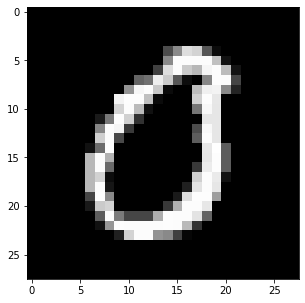

In [47]:
i = np.random.randint(0, len(test_X))
prediction = predict(W, B, test_data[i][0], len(B))
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {test_y[i]}")
plt.figure(figsize=(6, 5))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [55]:
#W, B = initialize_weights(layers = [784, 60, 60, 10])
alpha = 0.046
epochs = 4
L = 4
print(f"Starting Cost = {MSE(W, B, train_data, L)}")
sample_size = len(train_data)
for k in range(epochs):
    for j in range(sample_size):
        x, y = train_data[j]

        Z = [[0.0]]
        A = [x]

        for i in range(1, L):
            z = W[i]@A[i-1] + B[i]
            a = sigmoid(z)
    
            Z.append(z)
            A.append(a)
    
        deltas = dict()
        delta_last = (A[L-1] - y)*d_sigmoid(Z[L-1])
        deltas[L-1] = delta_last
        for i in range(L-2, 0, -1):
            deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
        for i in range(1, L):
            W[i] -= alpha*deltas[i] @ A[i-1].T
            B[i] -= alpha*deltas[i]    


    print(f"{k}-th Cost = {MSE(W, B, train_data, L)}")

Starting Cost = 0.0330729108583682
0-th Cost = 0.0285271697339077
1-th Cost = 0.025215070624012865
2-th Cost = 0.022768848090757
3-th Cost = 0.02085290673059235


In [53]:
alpha = 0.046
epochs = 30
L = len(layers)
print(f"Starting Cost = {MSE(W, B, train_data, L)}")
sample_size = len(train_data)
batch_size = 5
for k in range(epochs):
    batch_Z = []
    batch_A = []
    batch_deltas = []
    for _ in range(batch_size):
        j = np.random.randint(sample_size)
        x, y = train_data[j]

        Z = [[0.0]]
        A = [x]

        for i in range(1, L):
            z = W[i]@A[i-1] + B[i]
            a = sigmoid(z)
    
            Z.append(z)
            A.append(a)
    
        deltas = dict()
        delta_last = (A[L-1] - y)*d_sigmoid(Z[L-1])
        deltas[L-1] = delta_last
    
        for i in range(L-2, 0, -1):
            deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
        
        batch_deltas.append(deltas)
    
    for i in range(1, L):
        for deltas in batch_deltas:
            W[i] -= (alpha/batch_size)*deltas[i] @ A[i-1].T
            B[i] -= (alpha/batch_size)*deltas[i]    

    if k % 100 == 0:
        print(f"{k}-th Cost = {MSE(W, B, train_data, L)}")

NameError: name 'layers' is not defined

predicted digit is: 3
actual digit is: 3


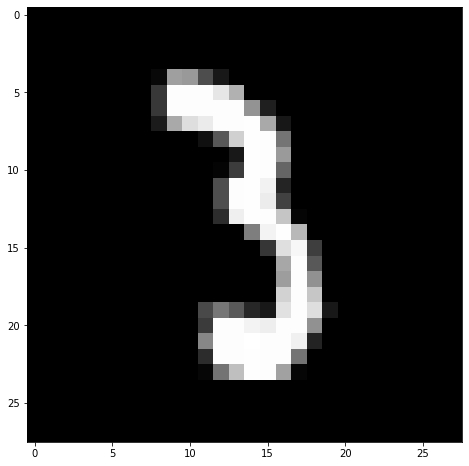

In [54]:
i = np.random.randint(0, len(test_X))
prediction = predict(W, B, test_data[i][0], len(B))
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {test_y[i]}")
plt.figure(figsize=(10, 8))
plt.imshow(test_X[i], cmap="gray")

In [ ]:
y = train_data[0][1]
deltas = dict()
delta_last = (A[-1] - y)*d_sigmoid(Z[-1])
deltas[L-1] = delta_last

for i in range(L-2, 0, -1):
    deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])


In [ ]:
deltas[L-2] = (W[L-1].T @ deltas[L-1])* d_sigmoid(Z[L-2])

In [ ]:
deltas[L-3] = (W[L-2].T @ deltas[L-2])*d_sigmoid(Z[L-3])

In [ ]:
alpha = 0.004
W[1] = W[1] - alpha*deltas[1] @ A[1-1].T
B[1] = B[1] - alpha*deltas[1]

W[2] = W[2] - alpha*deltas[2] @ A[2-1].T
B[2] = B[2] - alpha*deltas[2]

W[3] = W[3] - alpha*deltas[3] @ A[3-1].T
B[3] = B[3] - alpha*deltas[3]

In [ ]:
for i in range(1, L):
    W[i] -= alpha*deltas[i] @ A[i-1].T
    B[i] -= alpha*deltas[i]

In [ ]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B


In [ ]:
w=np.random.randn(layer_size[l],layer_size[l-1])*np.sqrt(2/layer_size[l-1])

In [ ]:
test_W[3].shape

(10, 60)

In [ ]:
def deltas(W, B, x, depth):
    Z, A = forward_pass(W, B, x, depth)
    L = depth
    delta = dict()
    delta[L] = (A[-1] - x[1])*d_sigmoid(Z[-1])
    for i in range(L-1, 1, -1):
        delta[i] = (delta[i+1]@W[i].T)*d_sigmoid(Z[-1])
    
    return A, delta

In [ ]:
deltas(test_W, test_B, train_data[0][0], 4)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 784)

In [ ]:
train_data

[]

In [ ]:
test_data

[]

In [ ]:
train_data

[]

In [ ]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.zeros((10, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])